# Extracción de Características

A diferencia del proceso de selección donde simplemente se eliminan las columnas menos relevantes, la extracción modifica el valor de los datos para reducir su dimensionalidad.

La utilidad de realizar esto radica en que podamos graficar el conjunto de datos (por ejemplo de 50 dimensiones que son las caracteristicas a 2) y poder visualizar de mejor manera el limite de decision de los modelos sobre el conjunto de datos.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

## Funciones Auxiliares

In [2]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [3]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

## 1. Leer el conjunto

In [5]:
df = pd.read_csv('../datasets/TotalFeatures-ISCXFlowMeter.csv')

In [6]:
df

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward,calss
0,1020586,668,1641,35692,2276876,52,52,679,1390,53.431138,...,0.0,-1,0.000000e+00,2,4194240,1853440,1640,668,32,benign
1,80794,1,1,75,124,75,124,75,124,75.000000,...,0.0,-1,0.000000e+00,2,0,0,0,1,0,benign
2,998,3,0,187,0,52,-1,83,-1,62.333333,...,0.0,-1,0.000000e+00,4,101888,-1,0,3,32,benign
3,189868,9,9,1448,6200,52,52,706,1390,160.888889,...,0.0,-1,0.000000e+00,2,4194240,2722560,8,9,32,benign
4,110577,4,6,528,1422,52,52,331,1005,132.000000,...,0.0,-1,0.000000e+00,2,155136,31232,5,4,32,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631950,530,1,1,74,334,74,334,74,334,74.000000,...,0.0,-1,0.000000e+00,2,0,0,0,1,0,benign
631951,50240627,23,24,4767,6107,52,52,533,855,207.260870,...,9842879.0,9964749,1.196806e+05,2,317952,107008,11,23,32,GeneralMalware
631952,35471450,1,2,52,104,52,52,52,52,52.000000,...,35300000.0,35290631,0.000000e+00,2,3904,88704,1,1,32,asware
631953,41713629,12,26,1821,18643,40,40,489,1390,151.750000,...,20200000.0,32711382,1.770000e+07,2,227456,2432,23,12,20,benign


## 2. Extraer las características

In [9]:
# Separamos las variables de entrada (x) de la etiqueta (y)
# Transformamos la etiqueta a valor numérico
x_df, y_df = remove_labels(df, 'calss')
y_df = y_df.factorize()[0]

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # Nro de caracteristicas a reducirse
df_reduced = pca.fit_transform(x_df) # Reducimos las caracteristicas

In [12]:
df_reduced = pd.DataFrame(df_reduced, columns=['c1', 'c2'])

In [13]:
df_reduced.head(10)

,c1,c2
0,-6.653632e+07,9.564604e+06
1,-6.704580e+07,9.898031e+06
2,-6.712784e+07,9.875840e+06
3,-6.699982e+07,9.782837e+06
4,-6.702599e+07,9.829385e+06
5,-6.691581e+07,9.791010e+06
6,-6.713106e+07,9.880533e+06
7,-6.709856e+07,9.884049e+06
8,-6.610628e+07,9.807246e+06
9,-6.705952e+07,9.848264e+06


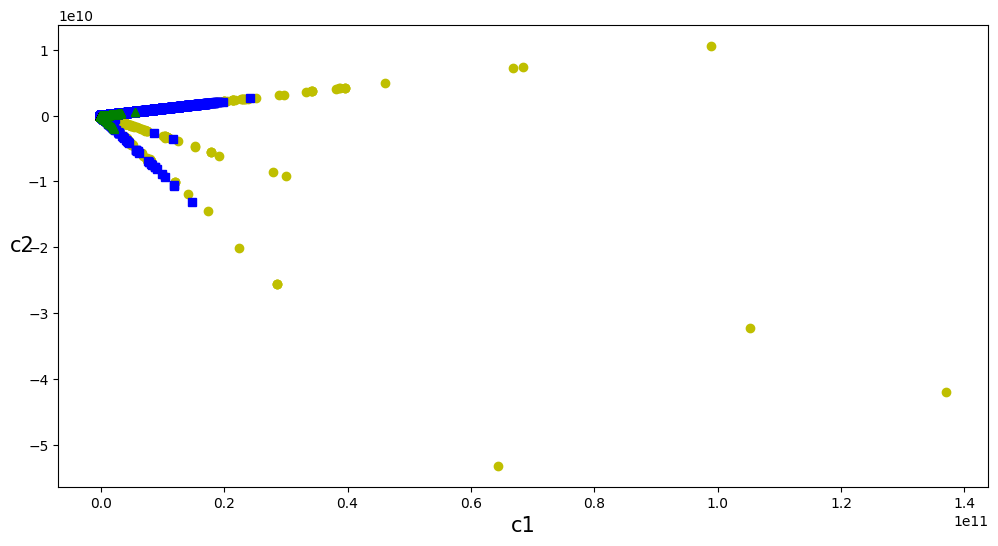

In [14]:
# Representar el conjunto de datos con el nro de caracteristicas reducidas
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.plot(df_reduced["c1"][y_df==0], df_reduced["c2"][y_df==0], "yo", label="normal")
plt.plot(df_reduced["c1"][y_df==1], df_reduced["c2"][y_df==1], "bs", label="adware")
plt.plot(df_reduced["c1"][y_df==2], df_reduced["c2"][y_df==2], "g^", label="malware")
plt.xlabel("c1", fontsize=15)
plt.ylabel("c2", fontsize=15, rotation=0)
plt.show()

In [15]:
# Calculamos la proporción de varianza que se ha preservado del conjunto original
pca.explained_variance_ratio_

array([0.91695209, 0.05610877])

El resultado anterior nos indica que el 91,6% de la varianza del conjunto de datos original se mantiene en el primer eje, y el 5,6% en el segundo eje. Esto quiere decir que aproximadamente 2,8% de la varianza se mantiene en el resto de ejes que no se han utilizado para construir el nuevo conjunto, por lo tanto, es razonable pensar que el resto de características del conjunto de datos no aportaban demasiada información.

In [16]:
# Crear un modelo con el conjunto reducido
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
model_tree.fit(df_reduced, y_df)

DecisionTreeClassifier(max_depth=15, random_state=42)

/home/ljmor/anaconda3/envs/curso_deep_learning/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

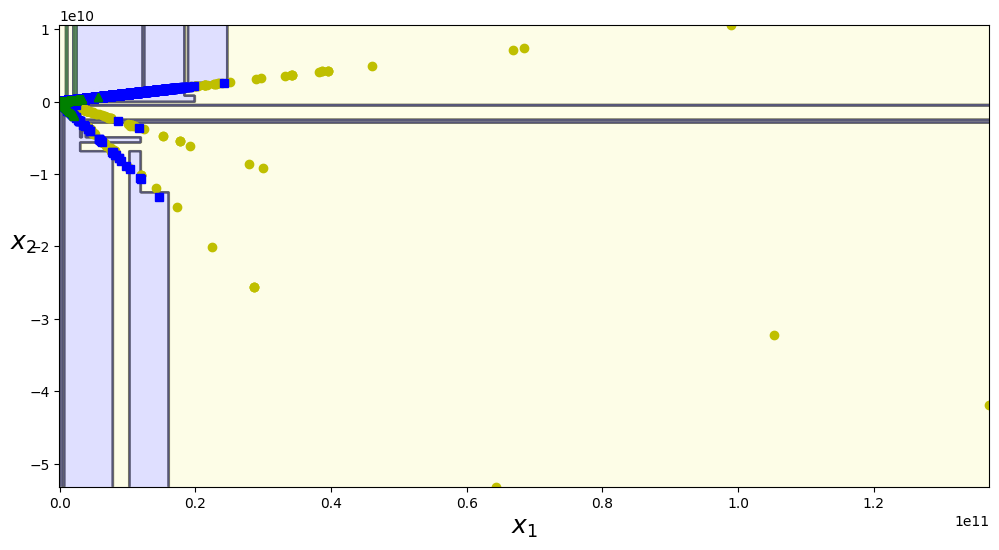

In [19]:
# Representamos el límite de decisión generado por el modelo
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, plot_training=True, resolution=1000):
    mins = X.min(axis=0) - 1
    maxs = X.max(axis=0) + 1
    x1, x2 = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="normal")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="adware")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="malware")
        plt.axis([mins[0], maxs[0], mins[1], maxs[1]])               
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

plt.figure(figsize=(12, 6))
plot_decision_boundary(model_tree, df_reduced.values, y_df)
plt.show()

## 3. Reduccion de dimensionalidad para entrenamiento

Si el objetivo no es reducir el numero de caracteristicas para graficar si no que lo es para mejorar el rendimiento al entrenar un modelo

In [20]:
# Reduccion del conjunto para mantener el 99% de varianza (consistencia de los datos)
from sklearn.decomposition import PCA

pca = PCA(n_components=0.999)
df_reduced = pca.fit_transform(x_df)

In [23]:
# N dimensiones del nuevo componente
print('Numero de componentes: ', pca.n_components_)

Numero de componentes:  6


In [22]:
# Calculamos la proporcion de la varianza que se ha preservado del valor original
pca.explained_variance_ratio_

array([9.16952089e-01, 5.61087653e-02, 2.16566915e-02, 3.65011318e-03,
       5.56686331e-04, 3.79356201e-04])

In [24]:
# Transformar a un df de Pandas
df_reduced = pd.DataFrame(df_reduced, columns=['c1', 'c2', 'c3', 'c4', 'c5', 'c6'])
df_reduced['Class'] = y_df
df_reduced.head(10)

,c1,c2,c3,c4,c5,c6,Class
0,-6.653632e+07,9.564604e+06,3.437284e+06,2.949219e+06,1.822415e+06,1.049114e+06,0
1,-6.704580e+07,9.898031e+06,3.424601e+06,3.127607e+06,2.800781e+06,1.063954e+06,0
2,-6.712784e+07,9.875840e+06,3.461085e+06,3.118886e+06,2.823975e+06,1.022121e+06,0
3,-6.699982e+07,9.782837e+06,3.436564e+06,3.051254e+06,2.557188e+06,9.126112e+05,0
4,-6.702599e+07,9.829385e+06,3.484764e+06,3.108501e+06,2.726738e+06,1.074407e+06,0
5,-6.691581e+07,9.791010e+06,3.491801e+06,3.077373e+06,2.522586e+06,1.007213e+06,0
6,-6.713106e+07,9.880533e+06,3.464159e+06,3.141950e+06,3.016967e+06,1.153611e+06,0
7,-6.709856e+07,9.884049e+06,3.446982e+06,3.121926e+06,2.813925e+06,1.036502e+06,0
8,-6.610628e+07,9.807246e+06,4.235049e+06,3.296929e+06,2.261580e+06,1.501393e+06,0
9,-6.705952e+07,9.848264e+06,3.480997e+06,3.157977e+06,2.766477e+06,1.053318e+06,0


## 4. Division del nuevo conjunto

In [25]:
# Dividimos el conjunto de datos
train_set, val_set, test_set = train_val_test_split(df_reduced)

In [26]:
x_train, y_train = remove_labels(train_set, 'Class')
x_val, y_val = remove_labels(val_set, 'Class')
x_test, y_test = remove_labels(test_set, 'Class')

## 5. Entrenar el modelo con el conjunto que posee unicamente caracteristicas relevantes

In [27]:
from sklearn.ensemble import RandomForestClassifier

model_rforest = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42, n_jobs=-1)
model_rforest.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [28]:
y_train_pred = model_rforest.predict(x_train)

In [30]:
print('Score: ', f1_score(y_train_pred, y_train, average='weighted'))

Score:  0.9791013835832979


In [31]:
y_val_pred = model_rforest.predict(x_val)

In [32]:
print('Score: ', f1_score(y_val_pred, y_val, average='weighted'))

Score:  0.8915353231469498
